## 两因素组间差异分析

### 当分组变量有两个时，例如小白鼠接种3种病毒，三种病毒形成了三种分组影响存活天数，
### 性别同样可能影响存活天数，更重要的是性别不同小白鼠对病毒的耐受性可能不同。
### 我们有多个分组变量，并且不同分组变量之间可能相关影响，这就不得不做多因素组间差异分析了
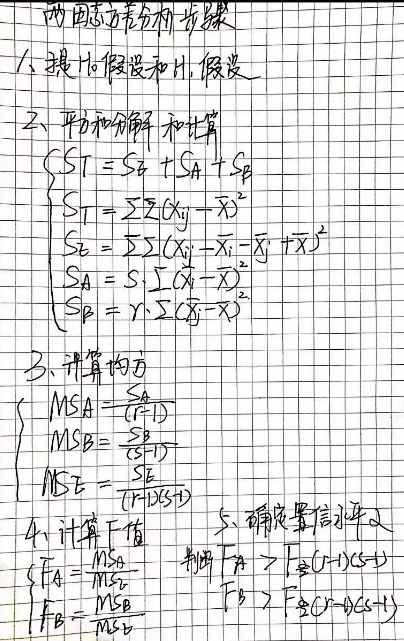

In [1]:
# 不同产地（变量A）和不同品种（因素B）都可能影响玉米产量，我们想用方差分析量化是否存在差异
agriculture<-data.frame(
    Y=c(325, 292, 316, 317, 310, 318,
    310, 320, 318, 330, 370, 365),
    A=gl(4,3),
    B=gl(3,1,12)
)

In [2]:
agriculture

Y,A,B
<dbl>,<fct>,<fct>
325,1,1
292,1,2
316,1,3
317,2,1
310,2,2
318,2,3
310,3,1
320,3,2
318,3,3


In [3]:
agriculture.aov <- aov(Y ~ A+B, data=agriculture)
summary(agriculture.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
A            3   3824  1274.7   5.226 0.0413 *
B            2    162    81.2   0.333 0.7291  
Residuals    6   1464   243.9                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [4]:
# 1.检验正态性假设
shapiro.test(residuals(agriculture.aov))
# 2. 检验方差齐性
bartlett.test(Y~A+B, data=agriculture)


	Shapiro-Wilk normality test

data:  residuals(agriculture.aov)
W = 0.93174, p-value = 0.3989


ERROR: Error in bartlett.test.formula(Y ~ A + B, data = agriculture): 'formula' should be of the form response ~ group


### 多因素方差分析的精华在于对交互作用的探讨：B的不同水平下A与Y的关系可能不同，欲量化此交互作用。
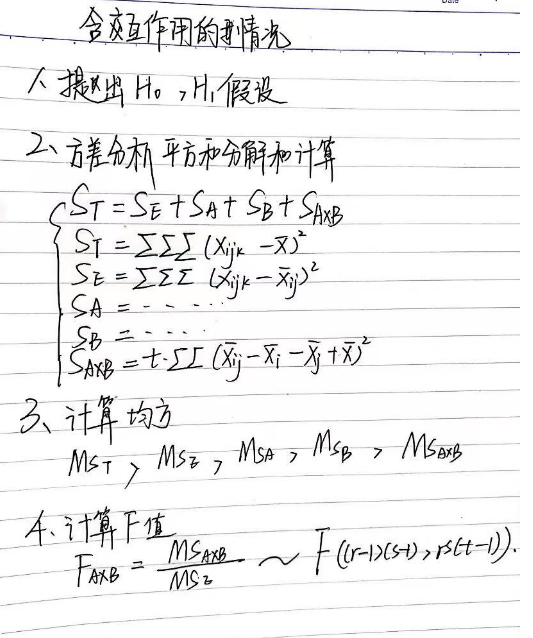

In [1]:
tree<-data.frame(
    Y=c(3, 5, 1, 24, 15, 20, 37, 11, 36, 21,
    16, 19, 13, 16, 24, 20, 21, 18, 27, 24,
    28, 30, 9, 17, 22, 26, 24, 21, 25, 26,
    19, 18, 19, 10, 15, 26, 16, 28, 29, 23,
    18, 15, 23, 18, 10, 21, 25, 12, 12, 22,
    19, 23, 22, 14, 13, 12, 13, 12, 12, 19),
    A=gl(3,20,60),
    B=gl(4,5,60))
head(tree)

,Y,A,B
,<dbl>,<fct>,<fct>
1,3,1,1
2,5,1,1
3,1,1,1
4,24,1,1
5,15,1,1
6,20,1,2


In [2]:
tree.aov <- aov(Y ~ A+B+A:B, data=tree)
summary(tree.aov)

            Df Sum Sq Mean Sq F value Pr(>F)  
A            2  235.2  117.60   3.087 0.0548 .
B            3  398.2  132.73   3.484 0.0228 *
A:B          6  573.1   95.51   2.507 0.0343 *
Residuals   48 1828.4   38.09                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

## 事后检验

### 简单效应如何？
控制B水平，A的效应；控制A水平，B的效应
### 简单主效应两两比较如何？
多重比较确定哪些被试间差异显著

In [3]:
# 简单效应分析
library(rstatix)
library(tidyverse)


tree %>%
  group_by(A) %>%
  anova_test(dv = Y,between = B) %>%
  get_anova_table() %>%
  adjust_pvalue(method = "bonferroni")

Warning message:
"程辑包'rstatix'是用R版本4.2.2 来建造的"

载入程辑包：'rstatix'


The following object is masked from 'package:stats':

    filter


Warning message:
"程辑包'tidyverse'是用R版本4.2.2 来建造的"
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.2 --
v ggplot2 3.4.0      v purrr   0.3.5 
v tibble  3.1.8      v dplyr   1.0.10
v tidyr   1.2.1      v stringr 1.4.1 
v readr   2.1.3      v forcats 0.5.2 
Warning message:
"程辑包'ggplot2'是用R版本4.2.2 来建造的"
Warning message:
"程辑包'readr'是用R版本4.2.2 来建造的"
Warning message:
"程辑包'forcats'是用R版本4.2.2 来建造的"
-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks rstatix::filter(), stats::filter()
x dplyr::lag()    masks stats::lag()


A,Effect,DFn,DFd,F,p,p<.05,ges,p.adj
<fct>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,B,3,16,3.600,0.037,*,0.403,0.111
2,B,3,16,2.520,0.095,,0.321,0.285
3,B,3,16,1.105,0.376,,0.172,1.000


In [19]:
#简单主效应两两比较
library(rstatix )
tree %>%
  group_by(A) %>%
  pairwise_t_test(Y ~ B)

,A,.y.,group1,group2,n1,n2,p,p.signif,p.adj,p.adj.signif
,<fct>,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>,<dbl>,<chr>
1,1,Y,1,2,5,5,0.00709,**,0.0425,*
2,1,Y,1,3,5,5,0.12900,ns,0.5140,ns
3,1,Y,2,3,5,5,0.15800,ns,0.5140,ns
4,1,Y,1,4,5,5,0.02440,*,0.1220,ns
5,1,Y,2,4,5,5,0.55600,ns,0.7820,ns
6,1,Y,3,4,5,5,0.39100,ns,0.7820,ns
7,2,Y,1,2,5,5,0.36700,ns,1.0000,ns
8,2,Y,1,3,5,5,0.16700,ns,0.6660,ns
9,2,Y,2,3,5,5,0.03030,*,0.1820,ns
